***Demo Prepared by Prof Monali Mavani***

This notebook explains bias variance tradeoff

 **Synthetic dataset** is used for demonstration

 Dataset is generated with follwing equation

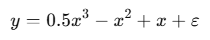

x∈[−3,3], evenly spaced (100 points)

ε∼N(0,1) is Gaussian noise with mean 0 and standard deviation 1

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


In [ ]:
# -----------------------------
# Generate nonlinear synthetic dataset
# -----------------------------
np.random.seed(42)
X = np.linspace(-3, 3, 100).reshape(-1, 1)
y = 0.5 * X[:, 0]**3 - X[:, 0]**2 + X[:, 0] + np.random.normal(0, 1, X.shape[0])
X_df = pd.DataFrame(X, columns=['X'])
y_df = pd.DataFrame(y, columns=['y'])
df = pd.concat([X_df, y_df], axis=1)
df.head()


,X,y
0,-3.000000,-25.003286
1,-2.939394,-24.415931
2,-2.878788,-22.447381
3,-2.818182,-20.428510
4,-2.757576,-21.080565


In [ ]:
# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X_df, y_df, test_size=0.3, random_state=42)

# Polynomial degrees to compare
degrees = [1, 3, 20]
results = []


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


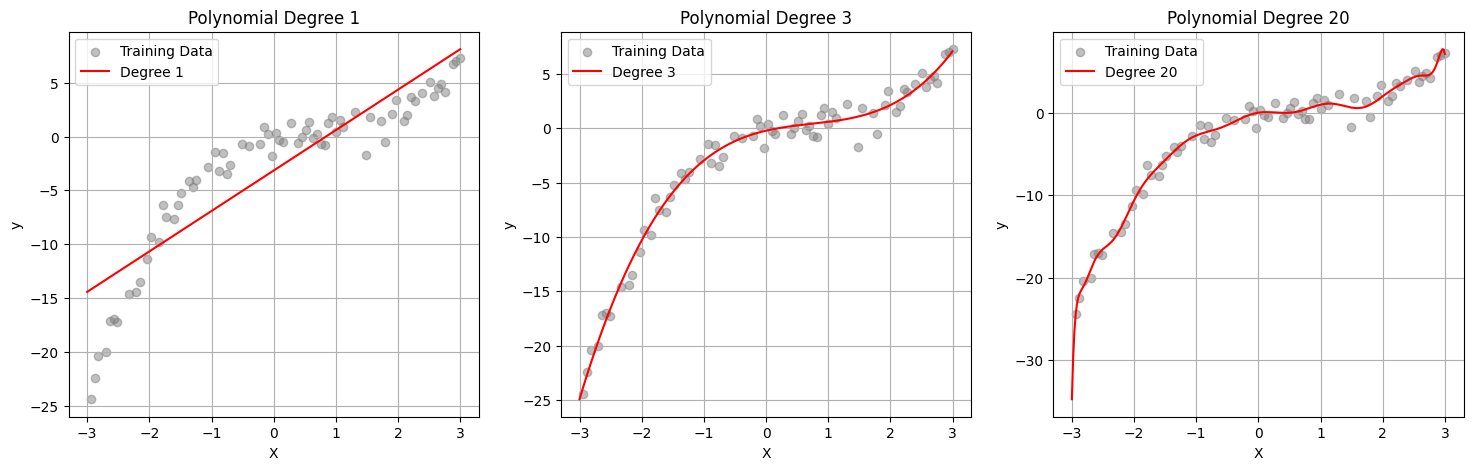

In [ ]:
# -----------------------------
# Plot predictions for each degree
# -----------------------------
plt.figure(figsize=(18, 5))

for i, degree in enumerate(degrees, 1):
    # Pipeline: scale → polynomial → linear regression
    model = Pipeline([
        ('scaler', StandardScaler()),
        ('poly', PolynomialFeatures(degree=degree)),
        ('reg', LinearRegression())
    ])
    model.fit(X_train, y_train)

    # Predict
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred)) # Remove squared=False
    test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))  # Remove squared=False
    train_r2 = r2_score(y_train, y_train_pred)
    test_r2 = r2_score(y_test, y_test_pred)

    results.append({
        "Degree": degree,
        "Train RMSE": round(train_rmse, 4),
        "Test RMSE": round(test_rmse, 4),
        "Train R²": round(train_r2, 4),
        "Test R²": round(test_r2, 4)
    })

    # Plot fitted curve
    X_plot = np.linspace(-3, 3, 300).reshape(-1, 1)
    y_plot = model.predict(X_plot)

    plt.subplot(1, 3, i)
    plt.scatter(X_train, y_train, color='gray', alpha=0.5, label='Training Data')
    plt.plot(X_plot, y_plot, color='red', label=f'Degree {degree}')
    plt.title(f'Polynomial Degree {degree}')
    plt.xlabel('X')
    plt.ylabel('y')
    plt.legend()
    plt.grid(True)


plt.show()

In [ ]:
# -----------------------------
# Display performance table
# -----------------------------
results_df = pd.DataFrame(results)
print("\nModel Performance Comparison:")
print(results_df.to_string(index=False))



Model Performance Comparison:
 Degree  Train RMSE  Test RMSE  Train R²  Test R²
      1      3.2837     3.6688    0.8012   0.7641
      3      0.9318     0.7471    0.9840   0.9902
     20      0.8317     2.0033    0.9872   0.9297


| Degree | Train RMSE | Test RMSE | Train R² | Test R² | Interpretation                                                                |
| ------ | ---------- | --------- | -------- | ------- | ----------------------------------------------------------------------------- |
| **1**  | 3.2837     | 3.6688    | 0.8012   | 0.7641  | **Underfitting** (high bias): model too simple                                |
| **3**  | 0.9318     | 0.7471    | 0.9840   | 0.9902  | **Best fit**: balanced bias-variance, low error                               |
| **20** | 0.8317     | 2.0033    | 0.9872   | 0.9297  | **Overfitting** (high variance): memorizes training data, poor generalization |
